$$ {\huge \text{ Disciplina: Logica Fuzzy }}\\  \\  \text{ Cap 8 - Simulações em Sistemas Fuzzy }\\
\ \  \ \ \ \ 
\\
 { \it  \text{ Discente: Prof. Dr. João Fernando }  }
 \\
\text{ Monitor: Arnaldo Araújo} \\
\text{ Mestrado e Doutorado em Ciências da Computação - UFC }$$


# Exemplo 8.2

<img src="Images/cap8-1.png">

In [19]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 

In [98]:
x1 = ctrl.Antecedent(np.arange(-180,181,1), 'x1')
y = ctrl.Consequent(np.arange(-10,11,1), 'y')

## VARIÁVEIS DO SISTEMAS

<img src="Images/cap8-2.png">

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


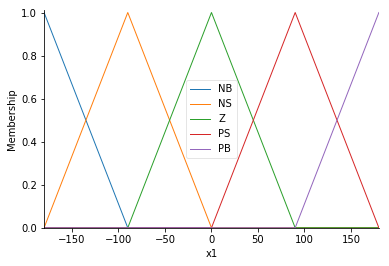

In [99]:
rotulosX = ['NB', 'NS', 'Z', 'PS', 'PB']
x1.automf(names=rotulosX)
x1.view()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


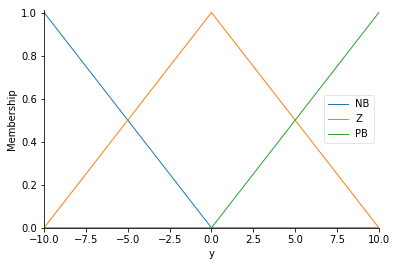

In [100]:
rotulosY = ['NB','Z','PB']
y.automf(names=rotulosY)
y.view()

### Também é possível settar os valores manualmente.
$$\large{Exemplo}\\ x1['NB'] = fuzz.trimf(x1.universe, [-180, -180, -90])
$$


## AGORA VAMOS DEFINIR AS REGRAS

<img src="Images/cap8-3.png">

In [101]:
rule1 = ctrl.Rule(antecedent=( x1['Z'] | x1['PB']),consequent=y['Z'],label='rule1' )
rule2 = ctrl.Rule(antecedent= x1['PS'] ,consequent=y['PB'],label='rule2' )
rule3 = ctrl.Rule(antecedent= ( x1['Z'] | x1['NB']),consequent=y['Z'],label='rule3' )
rule4 = ctrl.Rule(antecedent= x1['NS'] ,consequent=y['NB'],label='rule4' )



In [102]:
#crio o sistema de regras
system_regras = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4])


In [103]:
#crio o sistema de inferência
system = ctrl.ControlSystemSimulation(system_regras)

$$\large{\text{VAMOS AGORA REALIZAR A INFERÊNCIA PARA AS SEGUINTES ENTRADAS}}\\$$
$$\large{\text{x1 ={−135,−45,45,135}.}}$$

In [104]:
system.input['x1'] = -135 
system.compute()
print(system.output['y'])

-1.19047619048


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


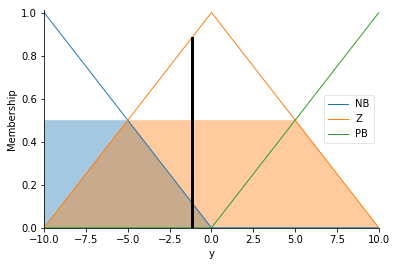

In [105]:
y.view(sim=system)

In [106]:
saida = list()
for k in x1.universe:
    system.input['x1'] = k
    system.compute()
    saida.append(system.output['y'])
saida = np.asarray(saida)


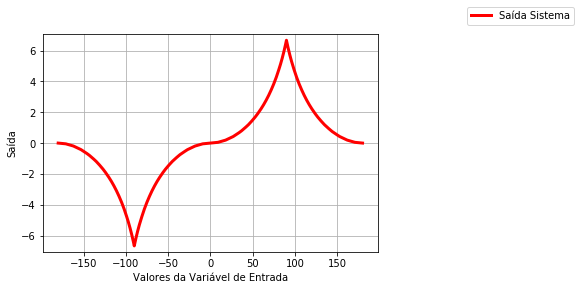

In [111]:
fig,ax = plt.subplots()
ax.plot(x1.universe,saida,'r-',linewidth=3,label= 'Saída Sistema')
#ax.plot(x1.universe,saidaReal,'g-',linewidth=3,label= 'Saída Sistema')
ax.set_ylabel('Saída')
ax.set_xlabel('Valores da Variável de Entrada')
ax.set_ylim(-7.05, 7.05);
ax.grid(True)
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()



# Exemplo 8.3

<img src="Images/exem8131.png">

<img src="Images/exem8132.png">

<img src="Images/exem8133.png">

<img src="Images/exem8134.png">

# Exemplo 8.4

<img src="Images/exem8141.png">

<img src="Images/exem8142.png">

<img src="Images/exem8143.png">